![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


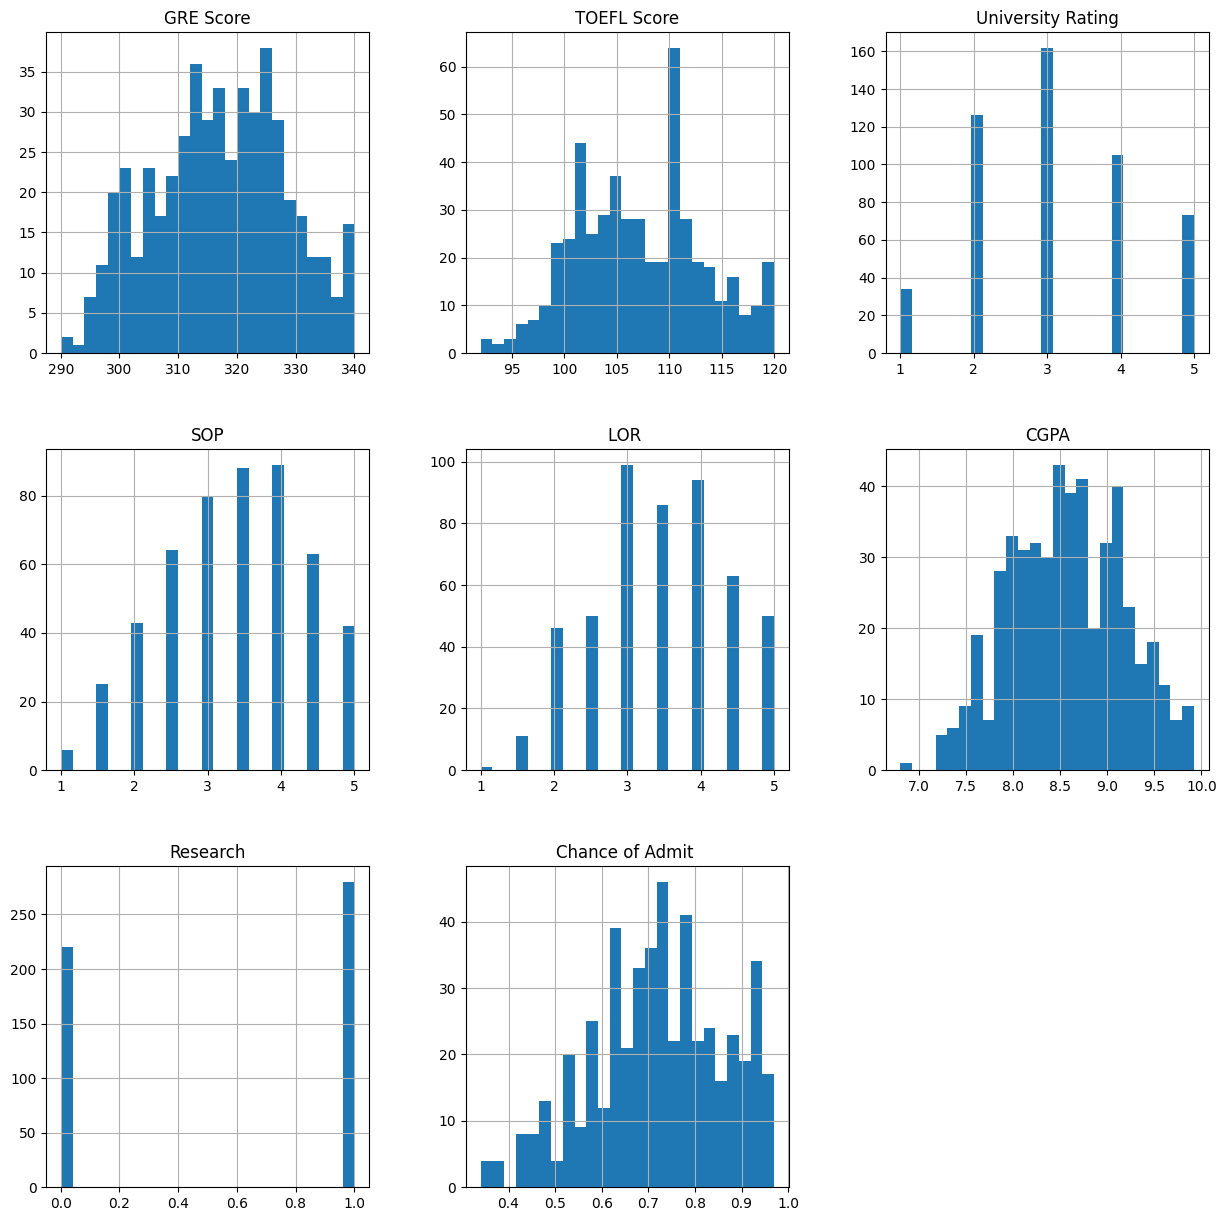

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(data[data.columns[-1]])

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [ ]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
!pip install livelossplot

In [ ]:
# Celda 1

# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
np.random.seed(2)
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

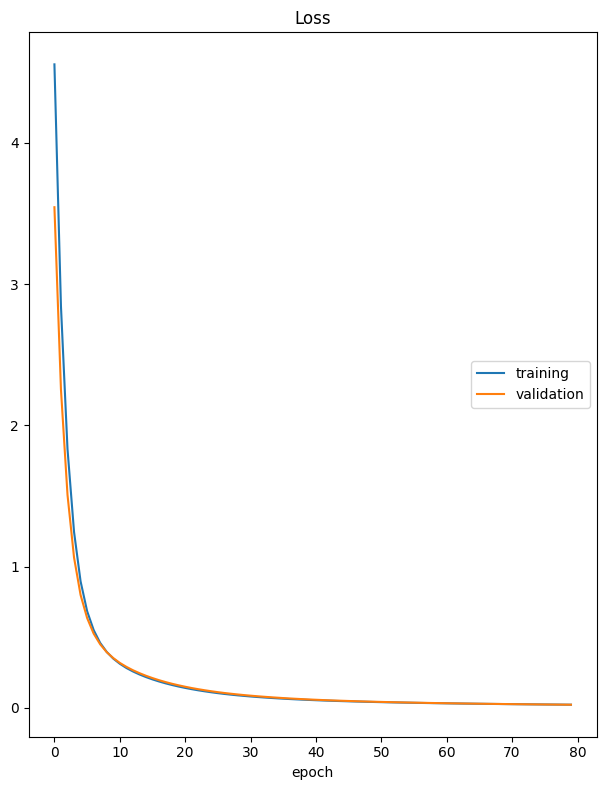

Loss
	training         	 (min:    0.022, max:    4.555, cur:    0.022)
	validation       	 (min:    0.022, max:    3.544, cur:    0.022)
3/3 [==============================] - 1s 517ms/step - loss: 0.0216 - val_loss: 0.0215


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=80, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop,PlotLossesKeras()])

In [ ]:
# Evaluar el desempeño del modelo en el set de test con MAE, MSE y RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae_1 = mean_absolute_error(Y_test, y_pred)
mse_1 = mean_squared_error(Y_test, y_pred)
rmse_1 = np.sqrt(mse_1)

print("MAE:", mae_1)
print("MSE:", mse_1)
print("RMSE:", rmse_1)

5/5 [==============================] - 0s 2ms/step
MAE: 0.11578871729373934
MSE: 0.021539736601927727
RMSE: 0.146764221123296


Se implementa una red neuronal de una sola capa densa usando la biblioteca Keras. La capa densa tiene un número de neuronas igual a la variable output_var, y toma como entrada un vector de características con dimensiones dims (7 en este caso).

Se define una instancia de EarlyStopping para detener el entrenamiento si la función de pérdida en el conjunto de validación no mejora después de dos épocas.

Se define una instancia de ModelCheckpoint para guardar el modelo con el mejor desempeño en términos de la función de pérdida en el conjunto de validación. P
osteriormente, se entrena la red neuronal. Se usa el conjunto de entrenamiento X_train y Y_train, y se validan los resultados en el conjunto de prueba X_test e Y_test. Se usan 80 épocas y un batch_size de 128.

En el modelo programado, la función de pérdida utilizada es 'mean_squared_error', que es comúnmente utilizada para problemas de regresión, donde se busca minimizar el error cuadrático medio entre las predicciones del modelo y los valores verdaderos. La elección de esta función de pérdida parece apropiada para el problema de predicción de probabilidad de admisión de estudiantes.

El optimizador utilizado es 'sgd', que significa descenso de gradiente estocástico. Este es uno de los algoritmos de optimización más utilizados para redes neuronales y es efectivo en la búsqueda de mínimos locales. 

En cuanto al número de épocas, se entrenó el modelo durante 80 épocas. El número de épocas depende de la complejidad del problema y del tamaño del conjunto de datos. Sin embargo, es importante tener en cuenta que un número excesivo de épocas puede llevar a un sobreajuste, mientras que un número insuficiente de épocas puede conducir a un modelo que no está lo suficientemente entrenado. La elección de 80 épocas parece no ser una buena elección para este problema, por lo cual se puede ajustar a 60 épocas para tratar de mejorar el desempeño del modelo. A continuación se muestra el desempeño de la red con 40 épocas.

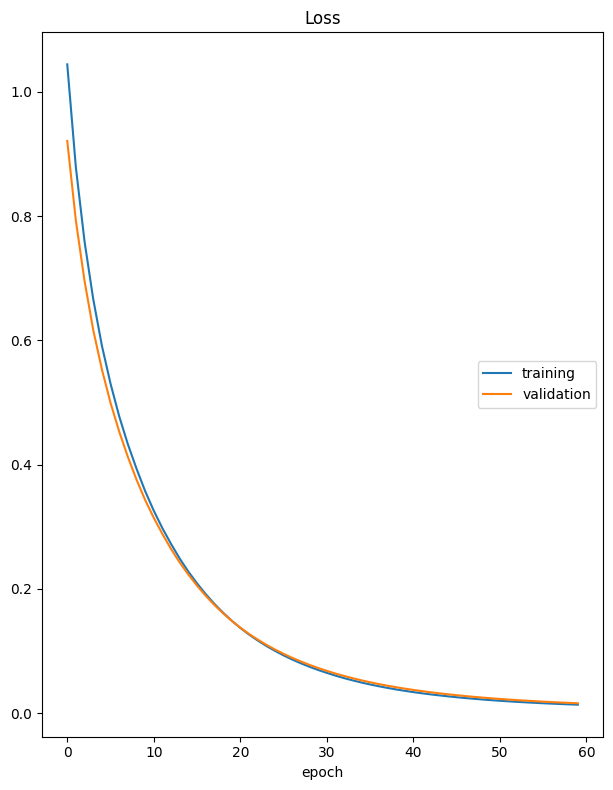

Loss
	training         	 (min:    0.013, max:    1.044, cur:    0.013)
	validation       	 (min:    0.016, max:    0.921, cur:    0.016)
3/3 [==============================] - 0s 171ms/step - loss: 0.0135 - val_loss: 0.0157


In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 60 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=60, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop,PlotLossesKeras()])

In [ ]:
y_pred_2 = model.predict(X_test)
mae_2 = mean_absolute_error(Y_test, y_pred_2)
mse_2 = mean_squared_error(Y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print("MAE:", mae_2)
print("MSE:", mse_2)
print("RMSE:", rmse_2)

5/5 [==============================] - 0s 3ms/step
MAE: 0.09834747515519458
MSE: 0.015744693466920524
RMSE: 0.12547786046518536


Resultados de las dos Redes:

| Punto  | Modelo                        | MAE      |MSE       |RMSE      |
|--------|-------------------------------|----------|----------|----------|
|    1   | Red Neuronal (epochs=80)      |  0.1157  |  0.0215  | 0.1467   |
|    1   | Red Neuronal (epochs=60)      |  0.0983  |  0.0157  | 0.1254   |

Como se observa en los resultados, al disminuir el número de épocas mejora el desempeño de la red neuronal.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la primera capa densa con un tamaño de salida de 256 y una activación 'relu'
model.add(Dense(256, input_shape=(dims,), activation='relu'))

# Definición de la segunda capa densa con un tamaño de salida de output_var y una activación 'relu'
model.add(Dense(output_var, activation='relu'))

# Definición de la función de pérdida
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


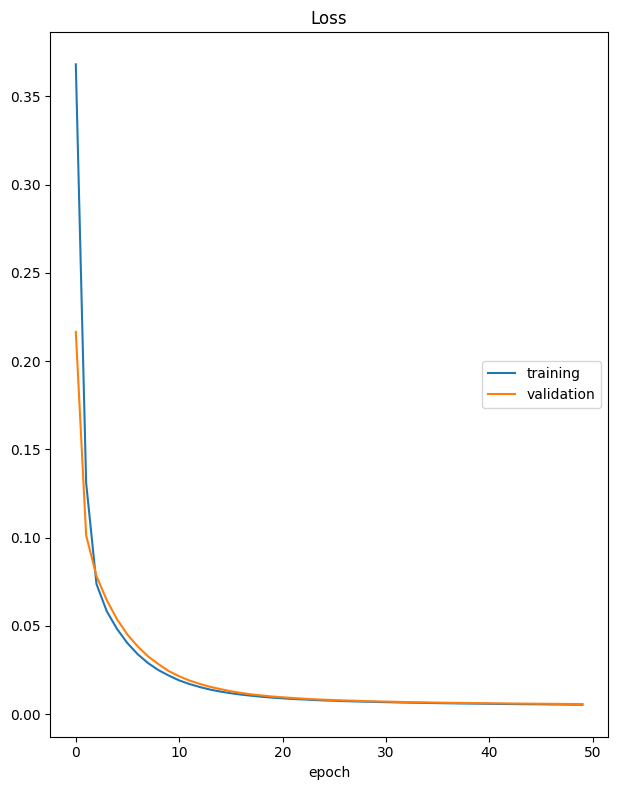

Loss
	training         	 (min:    0.005, max:    0.368, cur:    0.005)
	validation       	 (min:    0.006, max:    0.217, cur:    0.006)
11/11 [==============================] - 0s 36ms/step - loss: 0.0053 - val_loss: 0.0057


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_test,Y_test),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred_3 = model.predict(X_test)
mae_3 = mean_absolute_error(Y_test, y_pred_3)
mse_3 = mean_squared_error(Y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)

print("MAE:", mae_3)
print("MSE:", mse_3)
print("RMSE:", rmse_3)

5/5 [==============================] - 0s 2ms/step
MAE: 0.05967916576067606
MSE: 0.005673229754327543
RMSE: 0.07532084541697301


Se define una red neuronal con dos capas densas. La primera capa tiene un tamaño de salida de 256 y utiliza una activación 'relu'. La segunda capa tiene un tamaño de salida de output_var y también utiliza una activación 'relu'.

Luego se define la función de pérdida como 'mean_squared_error', en este caso, se está tratando con un problema de regresión, por lo que la función de pérdida 'mean_squared_error' es una buena elección. Esta función de pérdida mide el error cuadrático medio entre las etiquetas reales y las predicciones del modelo, lo que es apropiado para problemas de regresión.

El optimizador elegido es 'sgd', que representa el descenso de gradiente estocástico. El objetivo es minimizar la función de pérdida ajustando los pesos de la red neuronal en cada iteración. El optimizador 'sgd' actualiza los pesos de la red neuronal en cada iteración utilizando el gradiente de la función de pérdida en ese punto.

El número de épocas se establece en 50. El número de épocas es el número de veces que la red neuronal recorre todo el conjunto de entrenamiento durante el entrenamiento. Este número se establece en función del tamaño del conjunto de entrenamiento y de la complejidad del modelo. Si el modelo es complejo o el conjunto de entrenamiento es grande, se necesitan más épocas para ajustar los pesos correctamente. En este caso se evidencia que el número de épocas 

El número de neuronas se define como 256 en la primera capa y como output_var en la segunda capa. El número de neuronas en la capa oculta debe ser mayor que el número de neuronas en la capa de entrada, ya que la capa oculta extrae características y representa una forma de comprimir la información de entrada. La cantidad de neuronas en la capa de salida depende del tipo de problema, en este caso, como se trata de un problema de regresión, se utiliza una sola neurona en la capa de salida.

Finalmente, se entrena el modelo con los datos de entrenamiento X_train y Y_train, validando los resultados en el conjunto de datos de prueba X_test y Y_test durante 50 épocas. Se evidencia que la función de pérdida en Train y Test se estabiliza cuando las épocas están cerca de un valor de 25. A continuación se corre nuevamente la red con 25 épocas y se evalua nuevamente el desempeño en Test.

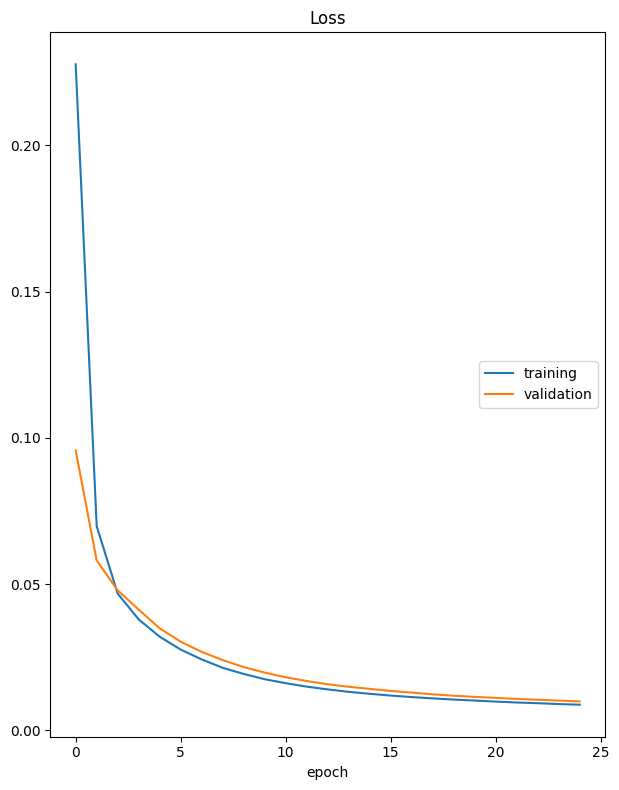

Loss
	training         	 (min:    0.009, max:    0.228, cur:    0.009)
	validation       	 (min:    0.010, max:    0.096, cur:    0.010)
11/11 [==============================] - 0s 31ms/step - loss: 0.0087 - val_loss: 0.0098


In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la primera capa densa con un tamaño de salida de 256 y una activación 'relu'
model.add(Dense(256, input_shape=(dims,), activation='relu'))

# Definición de la segunda capa densa con un tamaño de salida de output_var y una activación 'relu'
model.add(Dense(output_var, activation='relu'))

# Definición de la función de pérdida
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 25 épocas
model.fit(X_train, Y_train,
          validation_data = (X_test,Y_test),
          epochs=25, 
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred_4 = model.predict(X_test)
mae_4 = mean_absolute_error(Y_test, y_pred_4)
mse_4 = mean_squared_error(Y_test, y_pred_4)
rmse_4 = np.sqrt(mse_4)

print("MAE:", mae_4)
print("MSE:", mse_4)
print("RMSE:", rmse_4)

5/5 [==============================] - 0s 2ms/step
MAE: 0.0814820749203364
MSE: 0.009848773677362862
RMSE: 0.09924098788989791


Resultados de las dos Redes:

| Punto  | Modelo                        | MAE      |MSE       |RMSE      |
|--------|-------------------------------|----------|----------|----------|
|    1   | Red Neuronal (epochs=80)      |  0.1157  |  0.0215  | 0.1467   |
|    1   | Red Neuronal (epochs=60)      |  0.0983  |  0.0157  | 0.1254   |
|    2   | Red Neuronal (epochs=50)      |  0.0596  |  0.0056  | 0.0753   |
|    2   | Red Neuronal (epochs=25)      |  0.0814  |  0.0098  | 0.0992   |

Como se observa en los resultados, al disminuir el número de épocas mejora el desempeño de la red neuronal.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

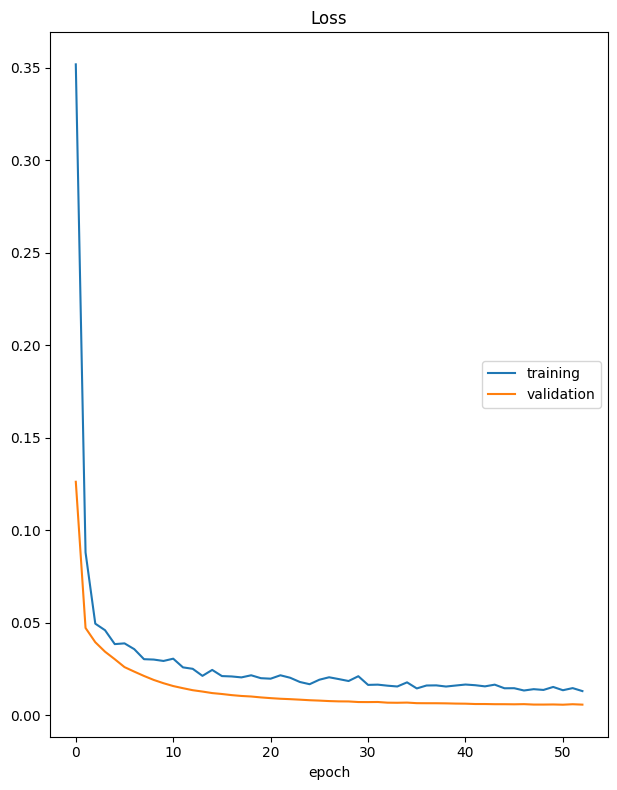

Loss
	training         	 (min:    0.013, max:    0.352, cur:    0.013)
	validation       	 (min:    0.006, max:    0.126, cur:    0.006)
11/11 [==============================] - 0s 37ms/step - loss: 0.0131 - val_loss: 0.0058
Epoch 53: early stopping


In [ ]:
# Celda 3

# Limpieza de la sesión de Keras
K.clear_session()

# Definición de la red neuronal con la función Sequential()
model = Sequential()

# Definición de la primera capa densa con un tamaño de salida de 256 y una activación 'relu'
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dropout(0.2)) # Añade Dropout con una tasa del 20%

# Definición de la segunda capa densa con un tamaño de salida de 256 y una activación 'relu'
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) # Añade Dropout con una tasa del 20%

# Definición de la capa de salida densa con un tamaño de salida de output_var y una activación 'relu'
model.add(Dense(output_var, activation='relu'))

# Definición de la función de pérdida y el optimizador
model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal con EarlyStopping y Dropout
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=100, 
          callbacks=[early_stop, PlotLossesKeras()])

La pérdida (loss) en el conjunto de entrenamiento (training) disminuyó de 0.013 a lo largo de las épocas. La pérdida en el conjunto de validación (validation) disminuyó de 0.006 a lo largo de las épocas.
El modelo se entrenó durante 53 épocas antes de que se activara la función de EarlyStopping debido a que la pérdida de validación no mejoró en 5 épocas consecutivas. La pérdida final en el conjunto de entrenamiento fue de 0.0131 y la pérdida final en el conjunto de validación fue de 0.0058. Estos valores indican que el modelo no está sobreajustando (overfitting) los datos de entrenamiento y es capaz de generalizar bien a nuevos datos.

In [ ]:
y_pred_5 = model.predict(X_test)
mae_5 = mean_absolute_error(Y_test, y_pred_5)
mse_5 = mean_squared_error(Y_test, y_pred_5)
rmse_5 = np.sqrt(mse_5)

print("MAE:", mae_5)
print("MSE:", mse_5)
print("RMSE:", rmse_5)

5/5 [==============================] - 0s 3ms/step
MAE: 0.05770154026349386
MSE: 0.005231016894992043
RMSE: 0.07232576923194141


En esta sección, se emplea la función de pérdida 'mean_squared_error' y el optimizador 'sgd', ambos muy comunes en problemas de regresión. Su propósito es minimizar la diferencia cuadrática entre las predicciones y los valores reales de las etiquetas.

Se ha establecido el número de épocas en 100 como valor inicial. No obstante, se ha implementado el uso de EarlyStopping con el objetivo de prevenir el sobreajuste y detener el entrenamiento si la pérdida en la validación no mejora durante dos épocas consecutivas. De esta manera, aunque se ha definido un número elevado de épocas, se confía en que EarlyStopping intervenga para interrumpir el entrenamiento en el momento más adecuado.

El número de neuronas en cada capa puede tener un impacto significativo en la capacidad del modelo para identificar patrones complejos en los datos. En este caso, se han utilizado dos capas densas, cada una con 256 neuronas, y se ha aplicado Dropout con una tasa del 20% para mitigar el sobreajuste. Este número de neuronas puede ser adecuado para una amplia variedad de problemas. Sin embargo, en algunas situaciones, puede ser necesario incrementar o disminuir este número. Si el modelo está ajustando excesivamente los datos de entrenamiento, se podría considerar aumentar la tasa de Dropout o reducir el número de neuronas. Por otro lado, si el modelo no está detectando patrones suficientemente complejos, se podría experimentar con un número mayor de neuronas.

Resultados de la red:

| Punto  | Modelo                        | MAE      |MSE       |RMSE      |
|--------|-------------------------------|----------|----------|----------|
|    1   | Red Neuronal (epochs=80)      |  0.1157  |  0.0215  | 0.1467   |
|    1   | Red Neuronal (epochs=60)      |  0.0983  |  0.0157  | 0.1254   |
|    2   | Red Neuronal Multicapa (epochs=50)      |  0.0596  |  0.0056  | 0.0753   |
|    2   | Red Neuronal Multicapa (epochs=25)      |  0.0814  |  0.0098  | 0.0992   |
|    3   | Red Neuronal Multicapa (EarlyStopping yDropout)      |  0.0577  |  0.0052  | 0.0723   |

Como se observa en los resultados, es el modelo que presenta mejor desempeño con respecto a los evaluados a lo largo de todo el notebook.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

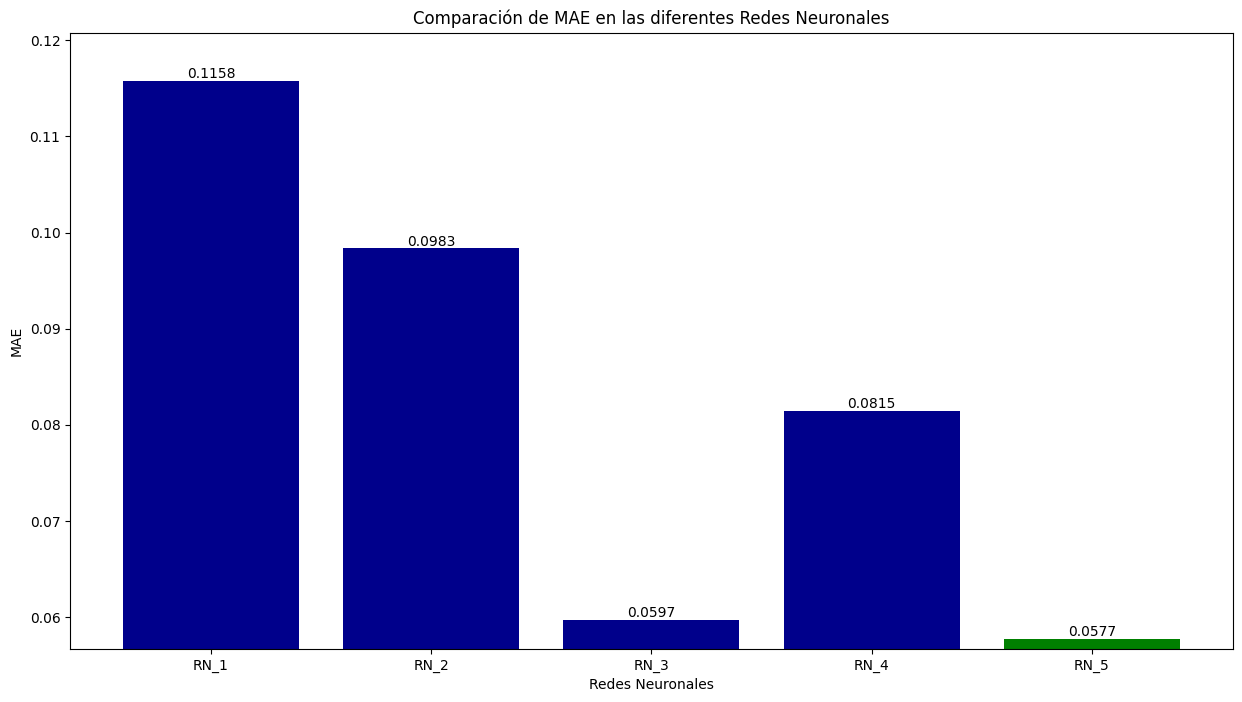

In [ ]:
# Celda 4
import matplotlib.pyplot as plt

mae = [mae_1,mae_2, mae_3,mae_4, mae_5]
labels = ["RN_1","RN_2", "RN_3", "RN_4", "RN_5"]

min_mae_index = mae.index(min(mae))
bar_colors = ["darkblue" if i != min_mae_index else "green" for i in range(len(mae))]
plt.figure(figsize=(15, 8))

plt.bar(labels, mae, color=bar_colors)
plt.xlabel("Redes Neuronales")
plt.ylabel("MAE")
plt.title("Comparación de MAE en las diferentes Redes Neuronales")

# lim eje y
min_mae_score = min(mae)
max_mae = max(mae)
for x, y in zip(labels, mae):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_mae_score - padding, max_mae + 0.005)

plt.show()

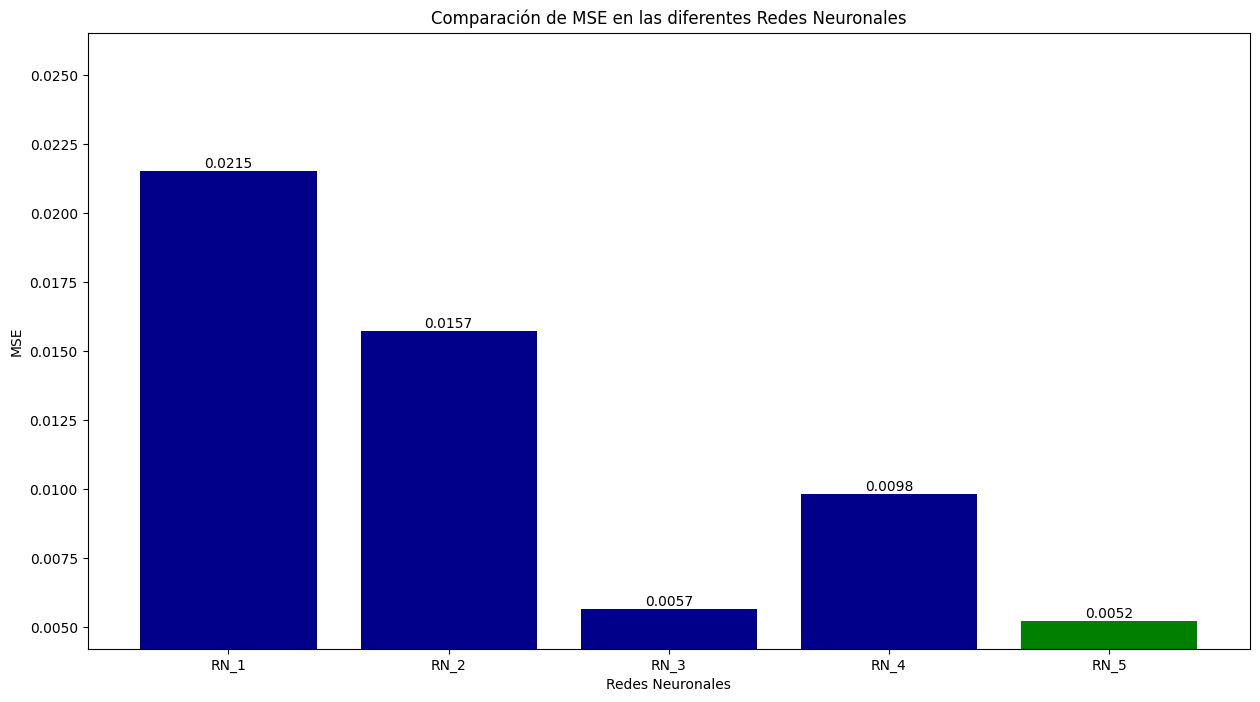

In [ ]:
mse = [mse_1,mse_2, mse_3,mse_4, mse_5]
labels = ["RN_1","RN_2", "RN_3", "RN_4", "RN_5"]

min_mse_index = mse.index(min(mse))
bar_colors = ["darkblue" if i != min_mse_index else "green" for i in range(len(mse))]
plt.figure(figsize=(15, 8))

plt.bar(labels, mse, color=bar_colors)
plt.xlabel("Redes Neuronales")
plt.ylabel("MSE")
plt.title("Comparación de MSE en las diferentes Redes Neuronales")

# lim eje y
min_mse_score = min(mse)
max_mse = max(mse)
for x, y in zip(labels, mse):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_mse_score - padding, max_mse + 0.005)

plt.show()

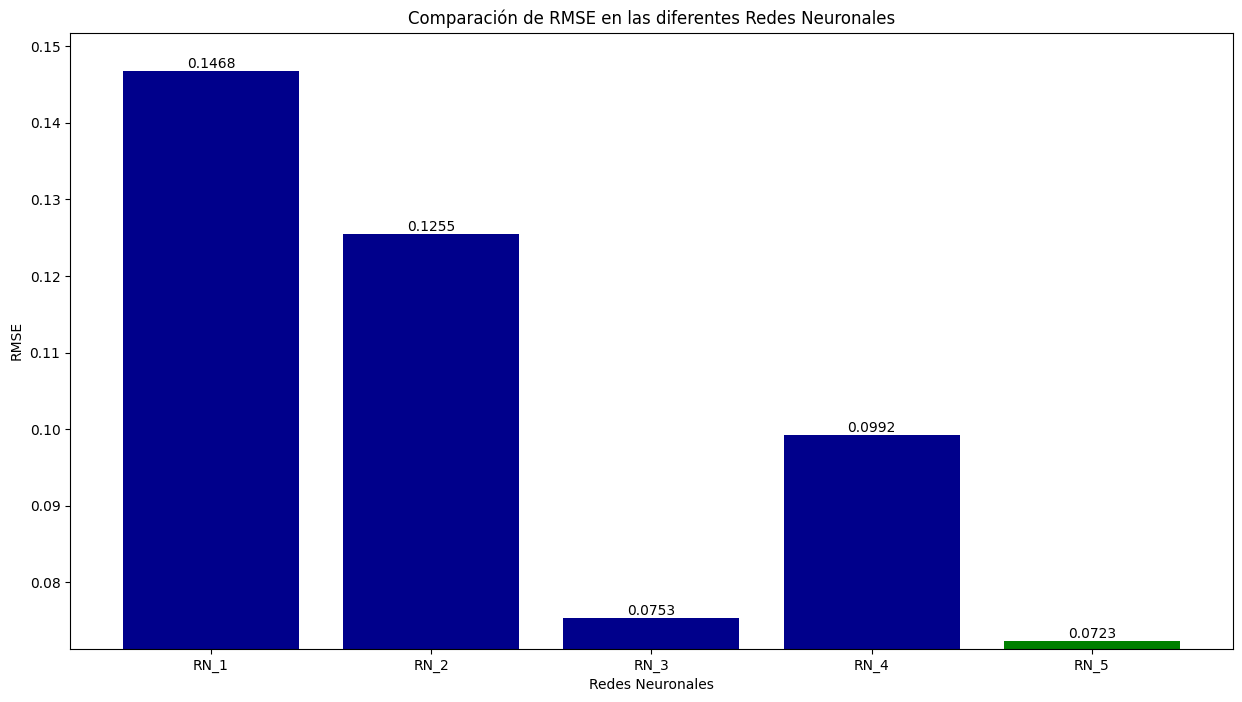

In [ ]:
rmse = [rmse_1,rmse_2, rmse_3,rmse_4,rmse_5]
labels = ["RN_1","RN_2", "RN_3", "RN_4", "RN_5"]

min_rmse_index = rmse.index(min(rmse))
bar_colors = ["darkblue" if i != min_rmse_index else "green" for i in range(len(rmse))]
plt.figure(figsize=(15, 8))

plt.bar(labels, rmse, color=bar_colors)
plt.xlabel("Redes Neuronales")
plt.ylabel("RMSE")
plt.title("Comparación de RMSE en las diferentes Redes Neuronales")

# lim eje y
min_rmse_score = min(rmse)
max_rmse = max(rmse)
for x, y in zip(labels, rmse):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_rmse_score - padding, max_rmse + 0.005)

plt.show()


| Modelo  | Descripción                        | MAE      |MSE       |RMSE      |
|--------|-------------------------------|----------|----------|----------|
|    RN_1  | Red Neuronal (epochs=80)      |  0.1157  |  0.0215  | 0.1467   |
|    RN_2   | Red Neuronal (epochs=60)      |  0.0983  |  0.0157  | 0.1254   |
|    RN_3   | Red Neuronal Multicapa (epochs=50)      |  0.0596  |  0.0056  | 0.0753   |
|    RN_4   | Red Neuronal Multicapa (epochs=25)      |  0.0814  |  0.0098  | 0.0992   |
|    RN_5   | Red Neuronal Multicapa (EarlyStopping yDropout)      |  0.0577  |  0.0052  | 0.0723   |

Los hallazgos presentados reflejan el rendimiento de diversos modelos de redes neuronales que se han entrenado a lo largo de este Notebook. Para valorar el desempeño de estos modelos, se aplicaron múltiples métricas, entre las que destacan el Error Absoluto Medio (MAE), el Error Cuadrático Medio (MSE), y la Raíz del Error Cuadrático Medio (RMSE).

Según estos resultados, es evidente que la RN_5, una red neuronal multicapa que se entrenó utilizando técnicas de EarlyStopping y Dropout, demostró el mejor rendimiento, con un MAE de 0.0577, un MSE de 0.0052 y un RMSE de 0.0723. Este modelo se entrenó a lo largo de 100 épocas, pero gracias al uso del método EarlyStopping para prevenir el sobreajuste, se detuvo el entrenamiento en la época 53.

La RN_3, otra red neuronal multicapa, también exhibió un buen rendimiento, registrando un MAE de 0.0596, un MSE de 0.0056 y un RMSE de 0.0753. Este modelo se entrenó a lo largo de 50 épocas, lo que resulta coherente con los resultados obtenidos con la RN_5.

En contraste, la RN_1 y la RN_4 no presentaron un rendimiento óptimo en comparación con los demás modelos, mientras que la RN_2 mostró resultados intermedios. La RN_1 se entrenó durante 80 épocas y la RN_4 durante 25, sugiriendo que el número de épocas no es necesariamente el factor determinante en el desempeño del modelo.

En términos generales, los resultados señalan a la RN_5 como el modelo más adecuado para este problema de regresión, en particular cuando se trata de predecir la probabilidad de admisión de los estudiantes. Le sigue la RN_3, ambas son redes neuronales multicapa con una arquitectura sofisticada y técnicas de regularización destinadas a prevenir el sobreajuste.